In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
topsoil = pd.read_csv('/home/jr13114/Documents/rn_flux/U_topsoil.csv')

/home/jr13114/.conda/envs/acrg/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [62]:
data = topsoil.U.values
lons = topsoil.LONG.values
lats = topsoil.LAT.values

output_lon = np.arange(-12, 30.5, 0.5) #Longitudes are expected in [0, 360] and latitudes in [-90, 90]
output_lat = np.arange(28, 75.5, 0.5)

In [72]:
#Creates the ordinary kriging
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian',
                     verbose=False, enable_plotting=False, coordinates_type='geographic')

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points

#z is the interpolated values 
z1, ss2 = OK.execute('grid', output_lon, output_lat)

In [73]:
dset = xr.Dataset( {"values": (["lon", "lat"],z1.T)},
                   coords={'lon':(['lon'], output_lon),
                           'lat':(['lat'], output_lat)})

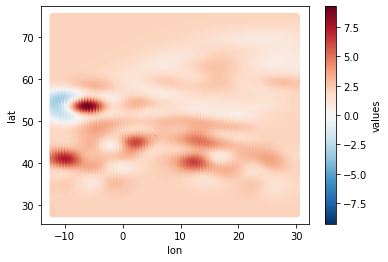

In [74]:
dset.plot.scatter('lon','lat','values')

In [45]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern

In [57]:
latlongrid = np.meshgrid(output_lon,output_lat)
data = data[:, np.newaxis]

In [75]:
import sklearn
kernel = Matern()
gp = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(latlongrid, data)

ValueError: Found array with dim 3. Estimator expected <= 2.